Introduction to Basic Probability and Statistics - Likelihood Functions and Estimation
<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Intro to Basic Probability and Statistics: Likelihood Functions and Estimation.</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 421, Spring 2024
Instructor: Brian Munsky
Authors: Huy Vo, Ania Baetica, Kaan Öcal, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



# Likelihood functions

Likelihood functions serve as fundamental tools for quantifying the plausibility of different parameter values given observed data. Likelihood functions form the backbone of various statistical methods, including maximum likelihood estimation (MLE), Bayesian inference, and hypothesis testing.

Likelihood functions provide a formal framework for evaluating how well different parameter values explain the observed data. By assessing the likelihood of observing the data under different parameter settings, we can infer the most plausible values for the parameters governing the underlying statistical model. This process of parameter estimation is essential for making predictions, testing hypotheses, and understanding the underlying mechanisms driving observed phenomena.

In this introduction, we will explore the concept of likelihood functions, their role in parameter estimation, and their practical applications in statistical analysis. We will delve into the principles of maximum likelihood estimation, which seeks to find the parameter values that maximize the likelihood function. Later in the course, we will also explore Bayesian inference, which incorporates prior knowledge about the parameters into the estimation process. 

Additionally, we will discuss the importance of likelihood-based approaches in biology and medicine.


## Definition of Likelihood function
The likelihood function is a fundamental concept in statistical inference that quantifies the plausibility of different parameter values given observed data. Let $\theta$ denote the parameter of interest in a statistical model, and let ($x_1, x_2, \ldots, x_n$) represent a sample of $n$ random variables sampled from the population. 

The likelihood function, denoted by  $L(\theta) \equiv L(\theta | x_1, x_2, \ldots, x_n) = \text{Prob}(x_1, x_2, \ldots, x_n | \theta ) $, is defined as the joint probability density function (PDF) or probability mass function (PMF) of the observed data when considered as a function of the parameter $\theta$. 

Under the assumption of that  ($x_1, x_2, \ldots, x_n$) are **independent and identically distributed** (i.i.d.) random variables, then the likelihood can be expressed:

$L(\theta) = \prod_{i=1}^n \text{Prob}(x_i|\theta)$

When dealing with products of many numbers, it is common practice to describe likelihood functions in terms of their logarthms:

$\log L(\theta) = \sum_{i=1}^n \log \text{Prob}(x_i|\theta)$

The likelihood function provides a measure of how well different parameter values explain the observed data. Intuitively, parameter values that result in a higher likelihood are considered more plausible given the observed data. Therefore, the likelihood function forms the basis for parameter estimation techniques such as maximum likelihood estimation (MLE) and Bayesian inference.


## Gaussian Example

Let $X_1, X_2, \ldots, X_n$ be a sample of $n$ independent and identically distributed random variables from a Gaussian (normal) distribution with mean $\mu$ and variance $\sigma^2$. The probability density function (PDF) of a single observation $X_i$ is given by:

$$
f(x_i \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

The likelihood function for the entire sample, denoted $L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n)$, is the product of the PDFs of the individual observations, since the observations are independent. Therefore, the likelihood function is given by:

$$
L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = \prod_{i=1}^{n} f(x_i \mid \mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

To simplify calculations and avoid numerical underflow or overflow, it's common practice to work with the logarithm of the likelihood function. Taking the logarithm of both sides of the likelihood function yields:

$$
\log L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = \sum_{i=1}^{n} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right)
$$

$$
= -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

This logarithm of the likelihood function is often used in practice for parameter estimation using maximum likelihood estimation (MLE) or Bayesian inference.


### Estimating the MLE by plotting the likelihood function.

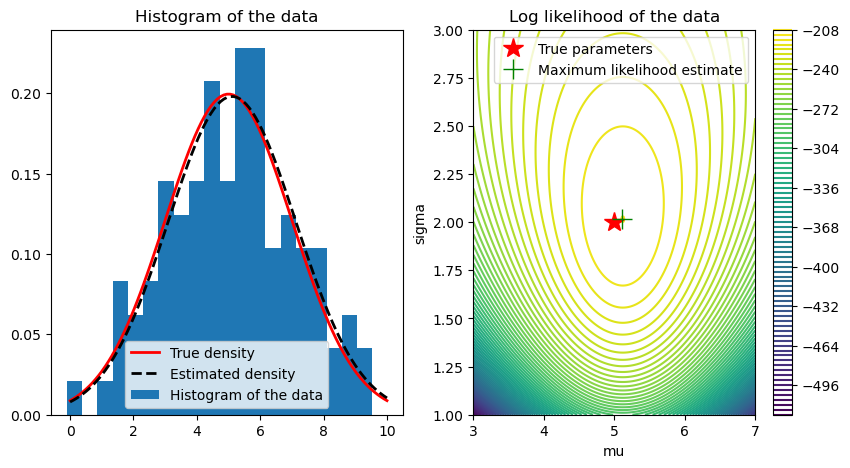

True mu:  5
True sigma:  2
Estimated mu (via plotting):  5.110552763819095
Estimated sigma: (via plotting) 2.015075376884422
Sample mean:  5.11961603106897
Sample standard deviation:  2.0157644894331592


In [1]:
# Example of maximum likelihood estimation for gaussian distribution

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.optimize import minimize

# Generate some random data
np.random.seed(0)
true_mu = 5
true_sigma = 2
N = 100
data = np.random.normal(true_mu, true_sigma, N)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Define a function to compute the log likelihood of the data given a mean and standard deviation
def log_likelihood(data, mu, sigma):
    return np.sum(stats.norm.logpdf(data, mu, sigma))

# Make a contour plot of the log likelihood function vs. mu and sigma
mu_vals = np.linspace(3, 7, 200)
sigma_vals = np.linspace(1, 3, 200)
mu_grid, sigma_grid = np.meshgrid(mu_vals, sigma_vals)
log_likelihood_grid = np.zeros(mu_grid.shape)
for i in range(mu_vals.size):
    for j in range(sigma_vals.size):
        log_likelihood_grid[j, i] = log_likelihood(data, mu_vals[i], sigma_vals[j])

cbar = ax[1].contour(mu_grid, sigma_grid, log_likelihood_grid, 100)
# Place a star at the true mu and sigma
ax[1].plot(true_mu, true_sigma, 'r*', markersize=15)
# Place crosshairs at the maximum likelihood estimate
max_likelihood_idx = np.unravel_index(np.argmax(log_likelihood_grid), log_likelihood_grid.shape)
ax[1].plot(mu_vals[max_likelihood_idx[1]], sigma_vals[max_likelihood_idx[0]], 'g+', markersize=15)

# Add a colorbar and labels
fig.colorbar(cbar, ax=ax[1])
ax[1].set_xlabel('mu')
ax[1].set_ylabel('sigma')
ax[1].set_title('Log likelihood of the data')
ax[1].legend(['True parameters', 'Maximum likelihood estimate'])

# Plot a histogram of the data
ax[0].hist(data, bins=20, density=True)
ax[0].set_title('Histogram of the data')
# add the true density
x = np.linspace(0, 10, 100)
ax[0].plot(x, stats.norm.pdf(x, true_mu, true_sigma), 'r', linewidth=2)
ax[0].legend(['True density', 'Histogram of the data'])
# Add the estimated density to the histogram in ax[0]
ax[0].plot(x, stats.norm.pdf(x, mu_vals[max_likelihood_idx[1]], sigma_vals[max_likelihood_idx[0]]), 'k--', linewidth=2)
ax[0].legend(['True density', 'Estimated density', 'Histogram of the data'])
plt.show()

# Print the true and estimated parameters
print('True mu: ', true_mu)
print('True sigma: ', true_sigma)
print('Estimated mu (via plotting): ', mu_vals[max_likelihood_idx[1]])
print('Estimated sigma: (via plotting)', sigma_vals[max_likelihood_idx[0]])

# Print the sample mean and standard deviation
print('Sample mean: ', np.mean(data))
print('Sample standard deviation: ', np.std(data, ddof=0))

### Estimating the MLE through an optimization search.

In [2]:
# Now, let's use an optimization algorithm to find the maximum likelihood estimate

# Define a function to compute the negative log likelihood for each set of parameters
def neg_log_likelihood(params, data):
    mu, sigma = params
    # Return the minus log likelihood (which we will want to minimize)
    return -np.sum(stats.norm.logpdf(data, mu, sigma))

# Use the minimize function to find the maximum likelihood estimate
result = minimize(neg_log_likelihood, [3, 3], args=(data,))

# Now let's compare the results to the previous estimate
# Print the true and estimated parameters
print('True mu: ', true_mu)
print('True sigma: ', true_sigma)
print('Estimated mu (via plotting): ', mu_vals[max_likelihood_idx[1]])
print('Estimated sigma: (via plotting)', sigma_vals[max_likelihood_idx[0]])
print('Estimated mu (via optimization): ', result.x[0])
print('Estimated sigma (via optimization): ', result.x[1])

# Print the sample mean and standard deviation
print('Sample mean: ', np.mean(data))
print('Sample standard deviation: ', np.std(data, ddof=0))

True mu:  5
True sigma:  2
Estimated mu (via plotting):  5.110552763819095
Estimated sigma: (via plotting) 2.015075376884422
Estimated mu (via optimization):  5.119616149776119
Estimated sigma (via optimization):  2.0157644759168174
Sample mean:  5.11961603106897
Sample standard deviation:  2.0157644894331592


### Estimation using builtin functions within numpy:

In [3]:
# Now let's use the built-in function to compute the maximum likelihood estimate
mu, sigma = stats.norm.fit(data)
print('Estimated mu (via built-in function): ', mu)
print('Estimated sigma (via built-in function): ', sigma)

Estimated mu (via built-in function):  5.11961603106897
Estimated sigma (via built-in function):  2.0157644894331592


Notice that the optimization and builtin routines gave us a result that was **very** close to the sample mean and sample variance.  That wasn't just a coincidence...

### Analytical Calculation of the MLE for Gaussian Distribution
To find the maximum likelihood estimators (MLEs) for $\mu$ and $\sigma^2$, we maximize the likelihood function with respect to these parameters. Taking the logarithm of the likelihood function, we have:

$$
\log L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = \sum_{i=1}^{n} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right)
$$

$$
= -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

To find the MLE for $\mu$, we differentiate the logarithm of the likelihood function with respect to $\mu$ and set it equal to zero:

$$
\frac{\partial}{\partial \mu} \log L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0
$$

Solving for $\mu$, we find:

$$
\hat{\mu}_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} x_i = \bar{x}
$$

which is the sample mean.

To find the MLE for $\sigma^2$, we differentiate the logarithm of the likelihood function with respect to $\sigma^2$ and set it equal to zero:

$$
\frac{\partial}{\partial \sigma^2} \log L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (x_i - \mu)^2 = 0
$$

Solving for $\sigma^2$, we find:

$$
\hat{\sigma}^2_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 = s^2
$$

which is the sample variance.

**Therefore, the maximum likelihood estimators (MLEs) for the mean and standard deviation of a Gaussian distribution are the sample mean $\bar{x}$ and the sample standard deviation $s$, respectively.**  These are very easy to compute as we have seen earlier!


## Practice MLE estimation on your own:
1) Generate five different random data sets from five different distributions (normal, beta, log-normal, gamma, t)
2) Compute the likelihood of each data set assuming a model with each of the five different distributions.
3) Optimize the parameters of for each combination of data and distributions (5 x 5 = 25 total optimizations).
4) Make a table to present the MLE log-likelihood versus model for each combination.
5) Comment on whether or not you could identify which data set came from which model

# Confidence Intervals

In most situations, a simple point estimate of some parameters is not sufficient.  We also need to know how accurate or trustworthy is that estimation.  This is the job of **Confidence Intervals**.

Basically, a confidence interval is a region of parameter space that is typically expected to contain the true parameters that you are trying to estimate. For example, if you estimated the interval at a confidence level of $\alpha = 95\%$, then would would expect that interval to contain the correct parameters set 95% of the time.

## Mathematics of confidence intervals.

To be a little more precise, let $X$ be a random sample from a probability distribution, $P$ that you wish to estimate.  Assume that $P$ depends on some parameters, $\theta$ that you want to know.  We not only want to find $\theta$, but we also want to know its confidence interval at some level, $\alpha$ (e.g., 95%). That is we would like to find an interval ($a(X),b(X)$), where $a(X)$ and $b(X)$ are random variables depending on the data, and we want them to satisfy the relationship,
$$ P(a(X) < \theta < b(X)) = \alpha, \text{ for every }\theta. $$

## Example to estimate confidence intervals of Gaussian-distributed data using built in function.

In [4]:
# For common distributions, the confidence intervals for the mean and standard deviation can be computed 
# using built-in functions. For example, for a Gaussian distribution, we can use the norm.interval function.

# Compute the standard error of the mean (for our original data set)
sem = np.std(data, ddof=0) / np.sqrt(N)
# Compute the standard error of the standard deviation
ses = np.std(data, ddof=0) / np.sqrt(2 * (N - 1))

# Compute the 95% confidence interval for the mean
ci_95_mu = stats.norm.interval(0.95, loc=np.mean(data), scale=sem)
# Compute the 95% confidence interval for the standard deviation
ci_95_sigma = stats.norm.interval(0.95, loc=np.std(data, ddof=0), scale=ses)

# Print the results
print('95% confidence interval for the mean: ', ci_95_mu)
print('95% confidence interval for the standard deviation: ', ci_95_sigma)



95% confidence interval for the mean:  (4.724533451008594, 5.514698611129346)
95% confidence interval for the standard deviation:  (1.7349915258048425, 2.296537453061476)


### Other Distributions with built in functions for confidence intervals
Some other distributions have built-in functions to compute confidence intervals for their parameters.
For example: 

* The confidence interval for the mean of a Poisson distribution can be computed using the poisson.interval function.
* The confidence interval for the mean of a binomial distribution can be computed using the binom.interval function.
* The confidence interval for the mean of an exponential distribution can be computed using the expon.interval function.
* The confidence interval for the mean of a gamma distribution can be computed using the gamma.interval function.
* The confidence interval for the mean of a beta distribution can be computed using the beta.interval function.
* The confidence interval for the mean of a chi-squared distribution can be computed using the chi2.interval function.
* The confidence interval for the mean of a t-distribution can be computed using the t.interval function.
* The confidence interval for the mean of an F-distribution can be computed using the f.interval function.

For other distributions, we can use the bootstrap method to compute confidence intervals for the parameters.

## Estimating confidence intervals using the bootstrap method.

Another approach to estimate confidence intervals is to use the **bootstrap method**. In this method, we
resample the data with replacement many times, and compute the maximum likelihood estimate for each
resampled data set. We can then use the percentiles of the estimates to compute the confidence intervals.

The advantage of the bootstrap method is that it can be used for any distribution, not just the common ones
for which built-in functions are available.

**Limitations** Some limitations of the bootstrap method are that it can be computationally expensive, and it may not work
well for small data sets. However, it can be a useful tool for estimating confidence intervals when the
distribution of the maximum likelihood estimates is not well approximated by a normal distribution.

In [5]:
# Now let's use the bootstrap to compute confidence intervals for the mean and standard deviation
# for our previous data set. We will use 1000 bootstrap samples to generate the confidence intervals.

# Define a function to compute the mean and standard deviation of a bootstrap sample
def bootstrap_mean_std(data):
    bootstrap_sample = np.random.choice(data, size=data.size, replace=True)
    return np.mean(bootstrap_sample), np.std(bootstrap_sample, ddof=0)

# Generate 1000 bootstrap samples
n_bootstrap = 1000
bootstrap_means = np.zeros(n_bootstrap)
bootstrap_stds = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    bootstrap_means[i], bootstrap_stds[i] = bootstrap_mean_std(data)

# Compute the 95% confidence interval for the mean
ci_95_mu_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
# Compute the 95% confidence interval for the standard deviation
ci_95_sigma_bootstrap = np.percentile(bootstrap_stds, [2.5, 97.5])

# Print the results and compare to the previous results
print('95% confidence interval for the mean (bootstrap): ', ci_95_mu_bootstrap)
print('95% confidence interval for the standard deviation (bootstrap): ', ci_95_sigma_bootstrap)
print('95% confidence interval for the mean (analytical): ', ci_95_mu)
print('95% confidence interval for the standard deviation (analytical): ', ci_95_sigma)


95% confidence interval for the mean (bootstrap):  [4.7288009  5.52960349]
95% confidence interval for the standard deviation (bootstrap):  [1.73395976 2.26437329]
95% confidence interval for the mean (analytical):  (4.724533451008594, 5.514698611129346)
95% confidence interval for the standard deviation (analytical):  (1.7349915258048425, 2.296537453061476)


#

## Practice working with confidence intervals.
1) Generate five different random data sets from five different distributions (normal, beta, log-normal, gamma, t)
2) If possible, use the builtin functions to estiamte the confidence intervals for each of the distribution's parameters.
3) Also use the bootstrapping approach to estimate the confidence intervals.


## Summary and Conclusions

Likelihood functions, parameter estimation, and confidence intervals are fundamental concepts in statistical inference. 

* **Likelihood functions** quantify the probability of observing a given set of data for different values of model parameters. 
* **Parameter estimation** involves finding the most likely values of model parameters that maximize the likelihood function, often using techniques like maximum likelihood estimation (MLE). 
* **Confidence intervals** provide a range of plausible values for model parameters, indicating the uncertainty associated with the estimation process (remember, this is not the same as telling you the uncertainty of your particular estimate). 

While these methods are widely used and provide valuable insights into the underlying data generation process, they also have **limitations**. 
* Likelihood functions, as we computed them above, assume that the data are **independent and identically distributed** (i.i.d.), which may not always hold in practice. This can be fixed with more complex multi-variate models, but it requires more work.
* Confidence intervals are based on **frequentist statistics** and do not directly account for prior knowledge or uncertainty in model parameters.  Science is not done in a vacuum, and this prior knowledge can be extremely valuable (we will address this limitation with  Bayesian estimation methods later in the course). 